In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma
%matplotlib inline

Text(0.5, 1.0, 'traceplot of sig2')

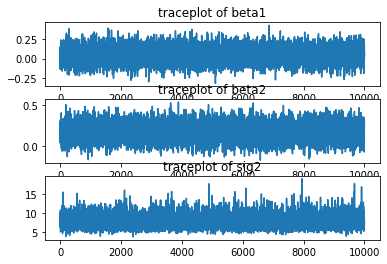

In [117]:
### Exercise 2.2.3
## Generate True Data
n_sample = 50
X = np.random.normal(0, 1, n_sample*2)
X = X.reshape(n_sample,2)
Y = np.matmul(X,[1,2]) + 1.5 * np.random.normal(0, 1, n_sample)

## Gibbs Sampling
# prior
alpha_0 = 10          
delta_0 = 10
beta_0 = [0, 0]
B_0 = 0.01 * np.eye(2)

# algorithm
# stage0
sig2_j = delta_0 / alpha_0
XX = np.matmul(X.T,X)
XY = np.matmul(X.T,Y)
B_0_inv = np.linalg.inv(B_0)
burn_in = 10000
burn_out = 100000
iter = burn_in + burn_out
beta_m = np.zeros((iter, 2))
sig2_m = np.zeros((iter, 1))

for i in range(iter):
    # stage1: beta under full conditional
    B1 = np.linalg.inv(1/sig2_j * XX + B_0_inv)
    A = 1/sig2_j * XY + np.matmul(B_0_inv, beta_0)
    
    beta1, beta2 = np.random.multivariate_normal(np.matmul(B1, A), B1, 1).T
    beta_m[i,0] = beta1
    beta_m[i,1] = beta2
    
    # stage2: sigma under full conditional
    Y_XB = (Y-np.matmul(X,beta_m[i,:]))
    sig2_j = invgamma.rvs((alpha_0 + n_sample)/2, scale=(delta_0 + np.matmul(Y_XB.T, Y_XB)/2))
    sig2_m[i,0] = sig2_j
    
# plot our data    
plt.figure(1)
plt.subplot(311)
plt.plot(beta_m[burn_out-1:,0])
plt.title('traceplot of beta1')
plt.subplot(312)
plt.plot(beta_m[burn_out-1:,1])
plt.title('traceplot of beta2')
plt.subplot(313)
plt.plot(sig2_m[burn_out-1:,0])
plt.title('traceplot of sig2')

Text(0.5, 1.0, 'histogram of sig2')

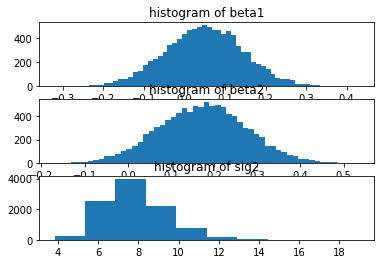

In [118]:
plt.figure(1)
plt.subplot(311)
plt.hist(beta_m[burn_out-1:,0], bins='auto')
plt.title("histogram of beta1")
plt.subplot(312)
plt.hist(beta_m[burn_out-1:,1], bins='auto')
plt.title("histogram of beta2")
plt.subplot(313)
plt.hist(sig2_m[burn_out-1:,0])
plt.title("histogram of sig2")

Text(0.5, 1.0, 'traceplot of sig2')

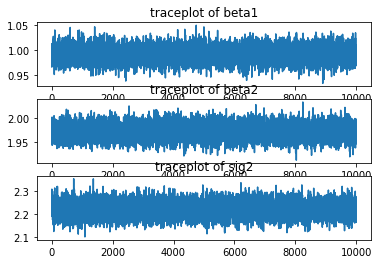

In [119]:
### Exercise 2.2.4
## Generate True Data
n_sample = 10000
X = np.random.normal(0, 1, n_sample*2)
X = X.reshape(n_sample,2)
Y = np.matmul(X,[1,2]) + 1.5 * np.random.normal(0, 1, n_sample)

## Gibbs Sampling
# prior
alpha_0 = 10          
delta_0 = 10
beta_0 = [0, 0]
B_0 = 0.01 * np.eye(2)

# algorithm
# stage0
sig2_j = delta_0 / alpha_0
XX = np.matmul(X.T,X)
XY = np.matmul(X.T,Y)
B_0_inv = np.linalg.inv(B_0)
burn_in = 10000
burn_out = 100000
iter = burn_in + burn_out
beta_m = np.zeros((iter, 2))
sig2_m = np.zeros((iter, 1))

for i in range(iter):
    # stage1: beta under full conditional
    B1 = np.linalg.inv(1/sig2_j * XX + B_0_inv)
    A = 1/sig2_j * XY + np.matmul(B_0_inv, beta_0)
    
    beta1, beta2 = np.random.multivariate_normal(np.matmul(B1, A), B1, 1).T
    beta_m[i,0] = beta1
    beta_m[i,1] = beta2
    
    # stage2: sigma under full conditional
    Y_XB = (Y-np.matmul(X,beta_m[i,:]))
    sig2_j = invgamma.rvs((alpha_0 + n_sample)/2, scale=(delta_0 + np.matmul(Y_XB.T, Y_XB)/2))
    sig2_m[i,0] = sig2_j
    
# plot our data    
plt.figure(1)
plt.subplot(311)
plt.plot(beta_m[burn_out-1:,0])
plt.title('traceplot of beta1')
plt.subplot(312)
plt.plot(beta_m[burn_out-1:,1])
plt.title('traceplot of beta2')
plt.subplot(313)
plt.plot(sig2_m[burn_out-1:,0])
plt.title('traceplot of sig2')

Text(0.5, 1.0, 'histogram of sig2')

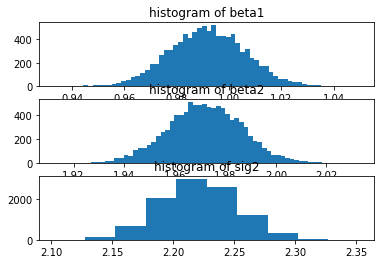

In [120]:
plt.figure(1)
plt.subplot(311)
plt.hist(beta_m[burn_out-1:,0], bins='auto')
plt.title("histogram of beta1")
plt.subplot(312)
plt.hist(beta_m[burn_out-1:,1], bins='auto')
plt.title("histogram of beta2")
plt.subplot(313)
plt.hist(sig2_m[burn_out-1:,0])
plt.title("histogram of sig2")